In [1]:
import numpy as np
import re
import glob
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
PATH = '/drive/diode/'
TRAIN = PATH + 'train'
TEST = PATH + 'val'

In [3]:
def load_dataset():
    """
    returns train and test images with their corresponding normals as labels
    """
    
    data = {}
    label = {}
    
    train_images = []
    val_images = []
    train_normals = []
    val_normals = []

    for filename in glob.iglob(TRAIN + '/**/*normal.npy', recursive=True):
        path = filename[:-11] + ".png"
        train_images.append(path)
        train_normals.append(filename)

    for filename in glob.iglob(TEST + '/**/*normal.npy', recursive=True):
        path = filename[:-11] + ".png"
        val_images.append(path)
        val_normals.append(filename)
    
    index = np.random.permutation(len(train_images))

    data['train'] = np.array(train_images)[index]
    label['train'] = np.array(train_normals)[index]
    
    data['val'] = val_images
    label['val'] = val_normals
    
    return data, label

In [4]:
d,l = load_dataset()

In [5]:
lab = l['train'][2]

(3, 768, 1024)


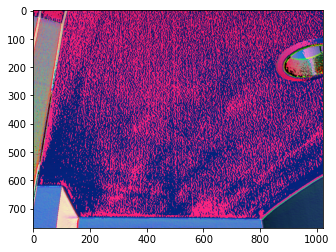

In [17]:
norm = np.load(lab)

norm = norm*255.

img = Image.fromarray(norm.astype(np.uint8))
plt.imshow(img)
img = np.array(img).transpose(2,0,1)
print(img.shape)

In [68]:
img = d['train'][2]

In [69]:
img = Image.open(img)
print(np.array(img).shape)

(768, 1024, 3)


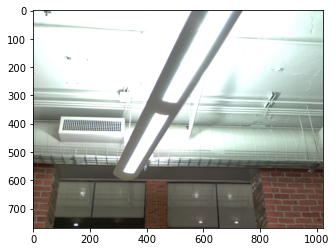

In [70]:
plt.imshow(img)